## Experimento para ver el efecto de una capa POOL 

In [19]:
N_EPOCHS = 20

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

![image.png](attachment:image.png)

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [24]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [25]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [26]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [27]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))

# Begin agregados
model_a.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))

model_a.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
# End agregados

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=2, padding='valid', activation='relu', input_shape=(28, 28, 1)))

# Begin agregados (mismas capas Conv que en el modelo de arriba pero sin pool)
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_b.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# End agregados

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [28]:
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [29]:
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               3110700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [30]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [31]:
model_history_a = model_a.fit(X_train, y_train, epochs=N_EPOCHS,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 3s 3ms/step - loss: 1.6061 - accuracy: 0.4582 - val_loss: 0.9644 - val_accuracy: 0.6478
Epoch 2/20
860/860 [==============================] - 3s 3ms/step - loss: 0.8314 - accuracy: 0.6908 - val_loss: 0.9667 - val_accuracy: 0.6372
Epoch 3/20
860/860 [==============================] - 3s 3ms/step - loss: 0.7105 - accuracy: 0.7357 - val_loss: 0.8572 - val_accuracy: 0.6992
Epoch 4/20
860/860 [==============================] - 3s 3ms/step - loss: 0.6419 - accuracy: 0.7598 - val_loss: 0.8854 - val_accuracy: 0.6570
Epoch 5/20
860/860 [==============================] - 3s 3ms/step - loss: 0.5968 - accuracy: 0.7793 - val_loss: 0.6034 - val_accuracy: 0.7790
Epoch 6/20
860/860 [==============================] - 3s 3ms/step - loss: 0.5601 - accuracy: 0.7915 - val_loss: 0.5295 - val_accuracy: 0.8144
Epoch 7/20
860/860 [==============================] - 3s 3ms/step - loss: 0.5329 - accuracy: 0.8030 - val_loss: 0.7217 - val_accuracy: 0.7374
Epoch 

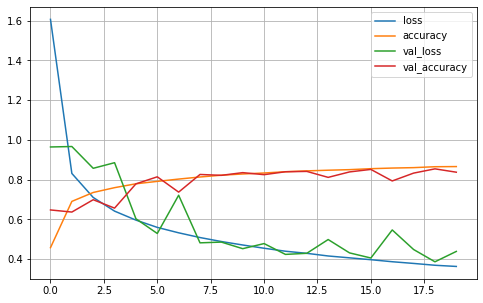

In [32]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [33]:
ev = model_a.evaluate(X_test_n, y_test)
print("Model A Loss: ", ev[0], "Model A Accuracy", ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.8326
Model A Loss:  0.48065638542175293 Model A Accuracy 0.8325999975204468


In [34]:
model_history_b = model_b.fit(X_train, y_train, epochs=N_EPOCHS,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 3s 4ms/step - loss: 0.9557 - accuracy: 0.6515 - val_loss: 0.7251 - val_accuracy: 0.7230
Epoch 2/20
860/860 [==============================] - 3s 4ms/step - loss: 0.5822 - accuracy: 0.7819 - val_loss: 0.6514 - val_accuracy: 0.7546
Epoch 3/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4940 - accuracy: 0.8167 - val_loss: 0.4590 - val_accuracy: 0.8356
Epoch 4/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4424 - accuracy: 0.8379 - val_loss: 0.4298 - val_accuracy: 0.8382
Epoch 5/20
860/860 [==============================] - 3s 4ms/step - loss: 0.4095 - accuracy: 0.8507 - val_loss: 0.3847 - val_accuracy: 0.8638
Epoch 6/20
860/860 [==============================] - 3s 4ms/step - loss: 0.3841 - accuracy: 0.8606 - val_loss: 0.4000 - val_accuracy: 0.8546
Epoch 7/20
860/860 [==============================] - 3s 4ms/step - loss: 0.3621 - accuracy: 0.8671 - val_loss: 0.3882 - val_accuracy: 0.8508
Epoch 

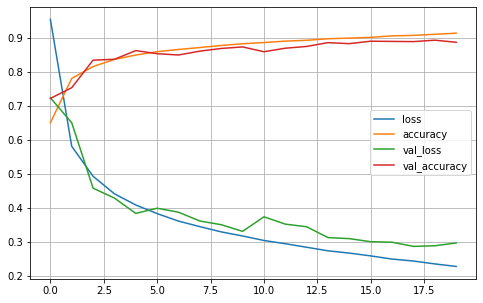

In [35]:
import pandas as pd

pd.DataFrame(model_history_b.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [36]:
ev = model_b.evaluate(X_test_n, y_test)
print("Model B Loss: ", ev[0], "Model B Accuracy", ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8826
Model B Loss:  0.32735908031463623 Model B Accuracy 0.8826000094413757


# Conclusiones

- Dado que hay más parámetros que entrenar, parecía conveniente incrementar el número de épocas.
- El accuracy del modelo A ( con capas pooling) es ligeramente inferior al accuracy del modelo B (sin capas de pooling):
  - Model A Accuracy 0.8325999975204468
  - Model B Accuracy 0.8826000094413757  
